<a href="https://colab.research.google.com/github/SanjayShetty01/Gold_And_Silver_Prices_using_ARIMA_in_Python/blob/main/Gold_%26_Silver_Price_Prediction_using_ARIMA_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gold & Silver Price Prediction using ARIMA in Python

### Set up and Data Preparation

In [ ]:
# Install the necessary libraries

!pip install yahoofinancials
!pip install pmdarima

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=64379bc632524a4850ab1e9a99e374d768465bfbfa54a3f733e927fe85caff3d
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials
     |████████████████████████████████| 1.5 MB 5.2 MB/s 
     |████████████████████████████████| 9.5 MB 25.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Import the necessary lib


import pandas as pd
import matplotlib.pyplot as plt
import pmdarima
from yahoofinancials import YahooFinancials
import numpy as np



In [ ]:
# Import the datasets
## Gold

tickerGold = "GC=F"

GoldFinancials = YahooFinancials(tickerGold)

GoldPrices = GoldFinancials.get_historical_price_data(start_date='2016-09-03', end_date = '2021-09-03', time_interval= 'daily')

In [ ]:
## Silver Prices

tickerSilver ="SI=F"

SilverFinancials = YahooFinancials(tickerSilver)

SilverPrices = SilverFinancials.get_historical_price_data(start_date='2016-09-03', end_date = '2021-09-03', time_interval= 'daily')

In [ ]:
# Since the data from Yahoo Finance is returned as a nested dict, so the necessary cleanning is done
# to get only the required data

GoldPricesCleaned = GoldPrices['GC=F']['prices']

In [ ]:
## Convert dict to Pandas DataFrame

GoldPrices_DF = pd.DataFrame.from_dict(GoldPricesCleaned)

GoldPrices_DF.head()

,date,high,low,open,close,volume,adjclose,formatted_date
0,1473134400,1349.400024,1323.199951,1323.300049,1349.400024,46.0,1349.400024,2016-09-06
1,1473220800,1350.500000,1343.900024,1348.400024,1344.300049,14.0,1344.300049,2016-09-07
2,1473307200,1345.400024,1335.699951,1344.800049,1336.800049,30.0,1336.800049,2016-09-08
3,1473393600,1338.500000,1328.000000,1338.500000,1330.099976,35.0,1330.099976,2016-09-09
4,1473652800,1329.300049,1319.900024,1327.000000,1321.000000,177.0,1321.000000,2016-09-12


In [ ]:
# Do the same for silver prices

SilverPricesCleaned = SilverPrices['SI=F']['prices']

In [ ]:
SilverPrices_DF = pd.DataFrame.from_dict(SilverPricesCleaned)

SilverPrices_DF.head()

,date,high,low,open,close,volume,adjclose,formatted_date
0,1473134400,20.100000,19.315001,19.395000,20.049000,825.0,20.049000,2016-09-06
1,1473220800,20.014999,19.735001,19.969999,19.759001,236.0,19.759001,2016-09-07
2,1473307200,19.875000,19.580000,19.795000,19.591000,237.0,19.591000,2016-09-08
3,1473393600,19.620001,19.025000,19.615000,19.282000,125.0,19.282000,2016-09-09
4,1473652800,19.035000,18.715000,19.035000,18.915001,253.0,18.915001,2016-09-12


In [ ]:
GoldPrices_DF.info()
SilverPrices_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1256 non-null   int64  
 1   high            1245 non-null   float64
 2   low             1245 non-null   float64
 3   open            1245 non-null   float64
 4   close           1245 non-null   float64
 5   volume          1245 non-null   float64
 6   adjclose        1245 non-null   float64
 7   formatted_date  1256 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 78.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1256 non-null   int64  
 1   high            1245 non-null   float64
 2   low             1245 non-null   float64
 3   open            1245 non-null   float64
 4   

In [ ]:
# Cleaning of Gold and Silver prices Dataframe

GoldPrices_DFCleaned = GoldPrices_DF.dropna()
SilverPrices_DFCleaned = SilverPrices_DF.dropna()


In [ ]:
# Since in finance only closing price is considered in most of the 
# forecasting model. We shall only take the closing prices for gold and silver


## Closing price for Gold

GoldPrices_DFCleaned_Close = GoldPrices_DFCleaned[['close']]

print(GoldPrices_DFCleaned_Close.head())

## Closing price for Silver

SilverPrices_DFCleaned_Close = SilverPrices_DFCleaned[['close']]

print(SilverPrices_DFCleaned_Close.head())



         close
0  1349.400024
1  1344.300049
2  1336.800049
3  1330.099976
4  1321.000000
       close
0  20.049000
1  19.759001
2  19.591000
3  19.282000
4  18.915001


Text(0.5, 1.0, 'Gold Prices from Sep 2016- Sep 2021')

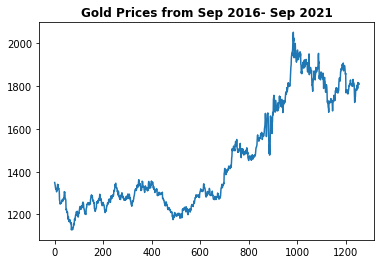

In [ ]:
plt.plot(GoldPrices_DFCleaned_Close)
plt.title('Gold Prices from Sep 2016- Sep 2021',fontweight='bold')

Text(0.5, 1.0, 'Silver Prices from Sep 2016-Seo 2021')

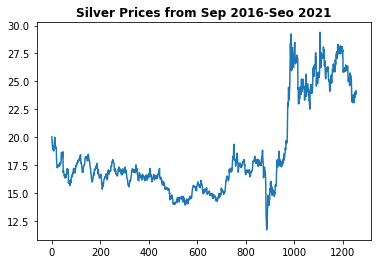

In [ ]:
plt.plot(SilverPrices_DFCleaned_Close)
plt.title('Silver Prices from Sep 2016-Seo 2021',fontweight='bold')

In [ ]:
# train test split (85:15)

# For Gold

GoldTrain, GoldTest = (GoldPrices_DFCleaned_Close[0:int(len(GoldPrices_DFCleaned_Close)*0.85)], 
                       GoldPrices_DFCleaned_Close[int(len(GoldPrices_DFCleaned_Close)*0.85):])

# For Silver

SilverTrain, SilverTest = (SilverPrices_DFCleaned_Close[0:int(len(SilverPrices_DFCleaned_Close)*0.85)], 
                       SilverPrices_DFCleaned_Close[int(len(SilverPrices_DFCleaned_Close)*0.85):])


In [ ]:
GoldTrain.shape

(1058, 1)

In [ ]:
GoldTest.shape

(187, 1)

## Creating ARIMA Models

### A quick brush up on ARIMA Models
ARIMA = Auto Regression Integrated Moving Averages

Here, 

**Autoregression** > predicting the values based on past ***values***

**Moving Values** > predicting the values vased on past ***errors***

**Integrated** > Used to convert non-stationary data to stationary data

General Format,
ARIMA(p,d,q)

p = no. of autoregressive terms
d = non-seasonal difference needed for stationarity
q = no. of lagged forecast errors




In [ ]:
# import the required library for ARIMA models

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


In [ ]:
## finding the order (p,d,q) of ARIMA using auto_arima from pmdarima library

# For Gold prices dataset

BestOrder = auto_arima(GoldPrices_DFCleaned_Close, trace = 'True') #traces = true would show all the steps
BestOrder

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10203.572, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10199.193, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10200.932, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10200.951, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10197.992, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10202.485, Time=0.81 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.461 seconds


ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
# For Silver prices dataset

BestOrder = auto_arima(SilverPrices_DFCleaned_Close, trace = 'True')
BestOrder

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1173.017, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1197.588, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1177.986, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1180.497, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1195.665, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1176.662, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1177.602, Time=1.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1169.733, Time=1.85 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1176.749, Time=1.48 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1172.019, Time=1.53 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1172.855, Time=3.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1169.963, Time=2.86 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1170.931, Time=1.23 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1173.945, Time=1.60 sec
 ARIMA(3,1,2)(0,0,0)[0]          

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
model = ARIMA(GoldTrain, order = [0,1,0])
modelGold = model.fit()
modelGold.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1058
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4287.787
Date:                Sat, 04 Sep 2021   AIC                           8577.574
Time:                        08:17:51   BIC                           8582.537
Sample:                             0   HQIC                          8579.455
                               - 1058                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       195.4407      3.514     55.618      0.000     188.553     202.328
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):              4226.56
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               5.29   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(SilverTrain, order = [3,1,2])
modelSilver = model.fit()
modelSilver.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1058
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -385.970
Date:                Sat, 04 Sep 2021   AIC                            783.940
Time:                        08:17:52   BIC                            813.719
Sample:                             0   HQIC                           795.228
                               - 1058                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6175      0.041    -15.012      0.000      -0.698      -0.537
ar.L2         -0.8067      0.047    -17.331      0.000      -0.898      -0.715
ar.L3         -0.0090      0.022     -0.418      0.676      -0.052       0.033
ma.L1          0.5220      0.038     13.862      0.000       0.448       0.596
ma.L2          0.8381      0.040     20.815      0.000       0.759       0.917
sigma2         0.1215      0.002     59.275      0.000       0.117       0.126
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8178.90
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.91   Skew:                            -0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


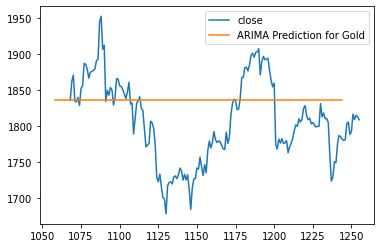

In [ ]:
# For Gold

start = len(GoldTrain)
end = len(GoldTrain)+ len(GoldTest) -1 

Goldpred = modelGold.predict(start =start,end = end).rename('ARIMA Prediction for Gold')


GoldTest.plot(legend = True)
Goldpred.plot(legend = True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


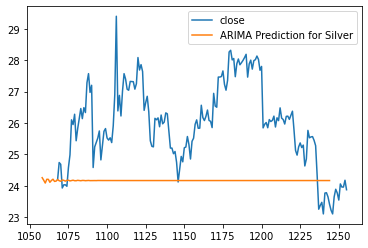

In [ ]:
# For Silver

start = len(SilverTrain)
end = len(SilverTrain)+ len(SilverTest) -1 

Silverpred = modelSilver.predict(start =start,end = end).rename('ARIMA Prediction for Silver')


SilverTest.plot(legend = True)
Silverpred.plot(legend = True)

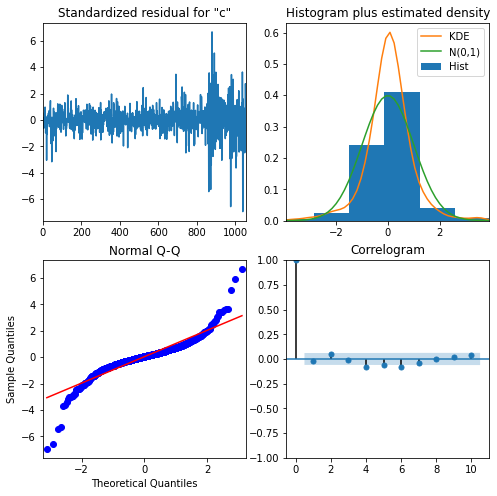

In [ ]:
modelGold.plot_diagnostics(figsize= (8,8))
plt.show()

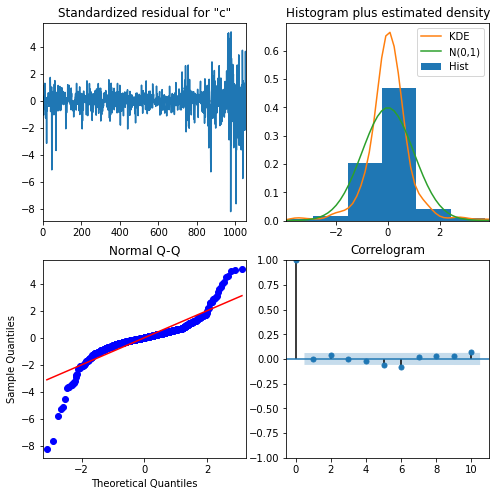

In [ ]:
modelSilver.plot_diagnostics(figsize= (8,8))
plt.show()